C:\Users\witby\AppData\Local\Temp\ipykernel_20036\1553198608.py:36: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return [int(np.round(x0)), int(np.round(y0))]


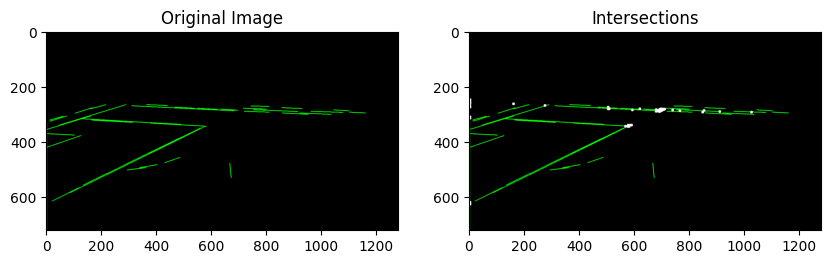

Intersection points:
[0, 628]
[3, 626]
[580, 345]
[709, 282]
[691, 291]
[702, 285]
[705, 284]
[589, 340]
[697, 288]
[698, 287]
[704, 284]
[0, 314]
[0, 621]
[0, 257]
[0, 254]
[0, 248]
[0, 625]
[0, 259]
[0, 309]
[0, 263]
[0, 275]
[0, 272]
[3, 315]
[3, 619]
[3, 257]
[3, 255]
[3, 248]
[3, 624]
[3, 259]
[3, 310]
[3, 263]
[3, 275]
[3, 272]
[567, 344]
[-3275, 143]
[576, 345]
[-3161, 149]
[-2932, 161]
[-1127, 255]
[-1213, 251]
[696, 281]
[678, 290]
[690, 284]
[692, 283]
[577, 340]
[684, 287]
[684, 287]
[690, 284]
[161, 263]
[504, 275]
[704, 282]
[-2989, 153]
[1024, 293]
[852, 287]
[687, 290]
[275, 269]
[504, 281]
[592, 285]
[506, 281]
[698, 285]
[619, 281]
[847, 293]
[764, 288]
[678, 284]
[701, 284]
[585, 340]
[693, 287]
[693, 287]
[699, 284]
[-2874, 159]
[909, 291]
[738, 285]
[-2646, 171]
[-984, 258]
[-1070, 253]
[680, 287]
[508, 281]


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = './assets/merged_lines_of_field.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Detect lines using Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

# Function to compute the intersection point of two lines
def compute_intersection(line1, line2):
    rho1, theta1 = line1[0]
    rho2, theta2 = line2[0]
    
    # Check if lines are parallel
    if np.abs(theta1 - theta2) < 1e-2:
        return None
    
    A = np.array([[np.cos(theta1), np.sin(theta1)], 
                  [np.cos(theta2), np.sin(theta2)]])
    b = np.array([[rho1], [rho2]])
    
    # Check if the determinant is close to zero (indicating parallel lines)
    if np.abs(np.linalg.det(A)) < 1e-10:
        return None
    
    x0, y0 = np.linalg.solve(A, b)
    return [int(np.round(x0)), int(np.round(y0))]

# Function to extend a line segment
def extend_line(rho, theta, length=1000):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + length * (-b))
    y1 = int(y0 + length * (a))
    x2 = int(x0 - length * (-b))
    y2 = int(y0 - length * (a))
    return (x1, y1), (x2, y2)

# Filter out short lines
min_line_length = 50
filtered_lines = []

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        (x1, y1), (x2, y2) = extend_line(rho, theta)
        length = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        if length >= min_line_length:
            filtered_lines.append(line)

# Create a copy of the original image to draw the intersections
intersection_image = np.copy(image)

# List to store the intersection points
intersections = []

# Iterate through each pair of lines and find intersections
num_lines = len(filtered_lines)
for i in range(num_lines):
    for j in range(i+1, num_lines):
        intersection = compute_intersection(filtered_lines[i], filtered_lines[j])
        if intersection is not None:
            intersections.append(intersection)
            cv2.circle(intersection_image, tuple(intersection), 5, (255, 255, 255), -1)  # Draw red circles

# Display the original image and the image with intersections
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Intersections')
plt.imshow(cv2.cvtColor(intersection_image, cv2.COLOR_BGR2RGB))

plt.show()

# Print the intersection points
print("Intersection points:")
for point in intersections:
    print(point)


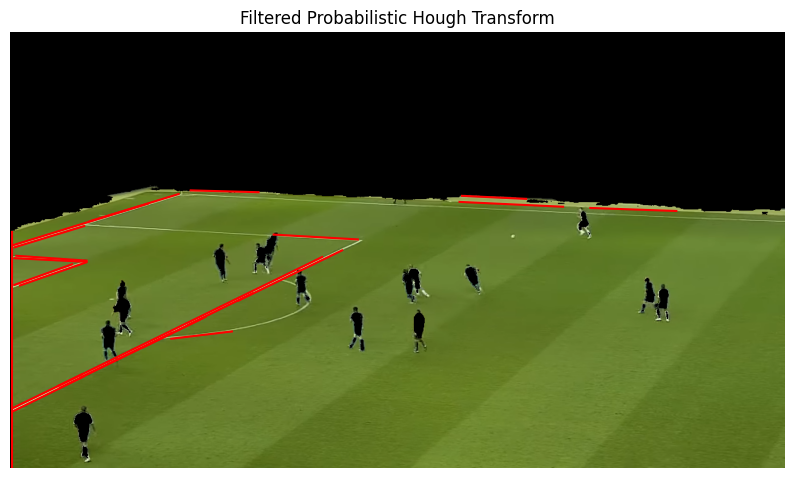

[(462.5, 401.5),
 (2.0, 523.5),
 (63.0, 597.0),
 (297.0, 477.5),
 (269.0, 496.0),
 (202.0, 528.5),
 (116.5, 317.0),
 (1029.0, 292.5),
 (799.0, 272.5),
 (204.5, 289.5),
 (60.5, 593.0),
 (827.5, 284.0),
 (191.5, 533.0),
 (66.5, 376.0),
 (354.0, 262.5),
 (316.0, 500.0),
 (347.0, 457.0),
 (68.0, 373.0),
 (504.5, 338.0),
 (70.5, 399.0),
 (64.5, 337.5),
 (54.5, 400.0)]

In [2]:
from skimage import io, color, feature, transform
import matplotlib.pyplot as plt
import numpy as np

# Load the new image
image_path_new = "assets\green_region.png"
image_new = io.imread(image_path_new)

# Convert the new image to grayscale
gray_image_new = color.rgb2gray(image_new)

# Perform edge detection using the Canny algorithm
edges_new = feature.canny(gray_image_new, sigma=2.0)

# Perform Hough Transform to detect lines
hough_result_new = transform.probabilistic_hough_line(edges_new, threshold=10, line_length=50, line_gap=10)

# Filter out lines based on length threshold
def line_length(p0, p1):
    return np.sqrt((p0[0] - p1[0])**2 + (p0[1] - p1[1])**2)

# Function to calculate the midpoint of a line segment
def midpoint(p0, p1):
    return ((p0[0] + p1[0]) / 2, (p0[1] + p1[1]) / 2)

# Calculate midpoints for all detected lines
midpoints = [midpoint(p0, p1) for p0, p1 in hough_result_new]

length_threshold = 100  # Set a length threshold to filter out small lines
filtered_hough_result = [line for line in hough_result_new if line_length(line[0], line[1]) >= length_threshold]

# Calculate midpoints for the filtered lines
filtered_midpoints = [midpoint(p0, p1) for p0, p1 in filtered_hough_result]

# Display the original image with filtered detected lines
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(image_new)
for line in filtered_hough_result:
    p0, p1 = line
    ax.plot((p0[0], p1[0]), (p0[1], p1[1]), '-r')
ax.set_title('Filtered Probabilistic Hough Transform')
ax.set_axis_off()

plt.show()

# Print the filtered midpoints
filtered_midpoints


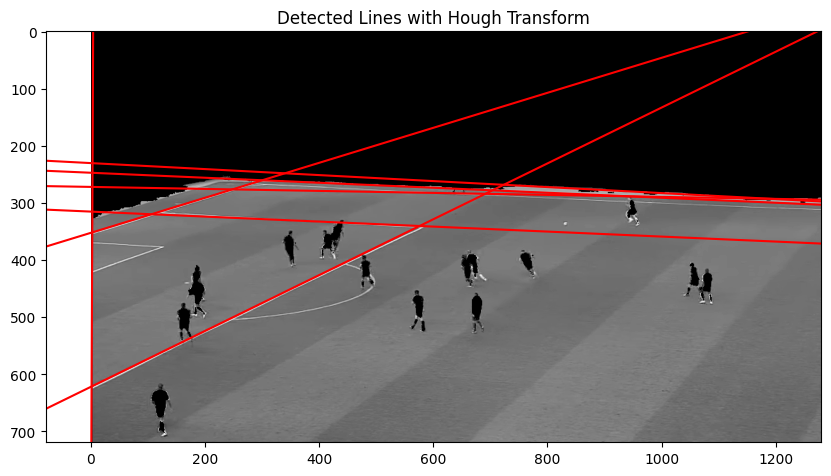

In [3]:
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform
import numpy as np

# Load the image
image_path = "assets\green_region.png"
image = io.imread(image_path)
gray_image = color.rgb2gray(image)

# Perform edge detection using Canny
edges = feature.canny(gray_image, sigma=2.0)

# Perform Hough transform to detect lines
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
hspace, angles, distances = transform.hough_line(edges, theta=tested_angles)

# Extract line segments
lines = transform.hough_line_peaks(hspace, angles, distances, threshold=0.3 * np.max(hspace))

# Filter out small lines and very close parallel lines
filtered_lines = []
min_line_length = 100  # Minimum length of line to keep
min_distance_between_parallel_lines = 10  # Minimum distance between parallel lines

for _, angle, dist in zip(*lines):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - gray_image.shape[1] * np.cos(angle)) / np.sin(angle)
    line_length = np.sqrt((gray_image.shape[1] - 0) ** 2 + (y1 - y0) ** 2)
    
    if line_length >= min_line_length:
        too_close = False
        for existing_angle, existing_dist in filtered_lines:
            if (abs(existing_angle - angle) < 0.1 and abs(existing_dist - dist) < min_distance_between_parallel_lines):
                too_close = True
                break
        if not too_close:
            filtered_lines.append((angle, dist))

# Plot the detected lines
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)

for angle, dist in filtered_lines:
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r')

ax.set_title('Detected Lines with Hough Transform')
plt.show()


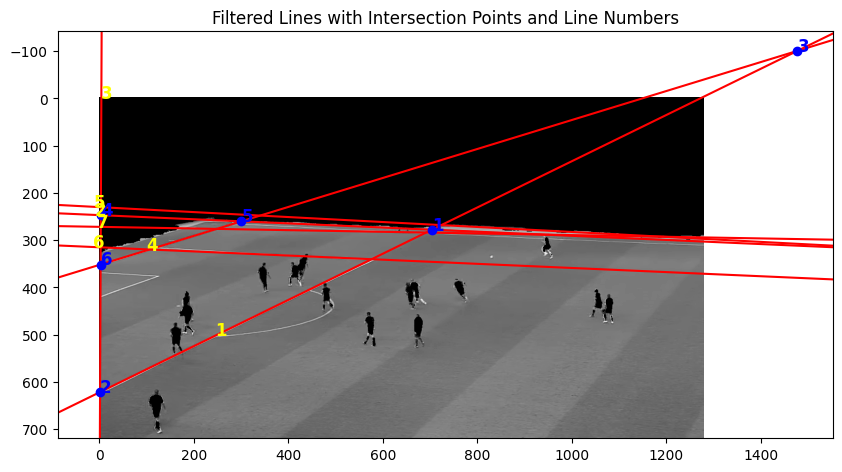

Numbered Lines (angle, distance):
1: (1.1157466945200518, 559.0)
2: (-1.527041554460777, -247.0)
3: (0.004375477233411917, 4.0)
4: (1.2732638749228826, 337.0)
5: (-1.5182905999939529, -230.0)
6: (-1.527041554460777, -315.0)
7: (-1.5532944178612487, -272.0)


In [7]:
# Plot the remaining lines with their intersection points and line numbers
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)

for idx, (angle, dist) in enumerate(filtered_lines):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r')
    ax.text(x0, y0, str(idx + 1), color='yellow', fontsize=12, weight='bold')  # Number the lines

for idx, point in enumerate(intersection_points):
    ax.plot(point[0], point[1], 'bo')  # Plot intersection points as blue dots
    ax.text(point[0], point[1], str(idx + 1), color='blue', fontsize=12, weight='bold')  # Number the points

ax.set_title('Filtered Lines with Intersection Points and Line Numbers')
plt.show()

# Print the remaining lines with their numbers
print("Numbered Lines (angle, distance):")
for idx, line in enumerate(filtered_lines):
    print(f"{idx + 1}: {line}")


Remaining Lines (angle, distance):
(1.1157466945200518, 559.0)
(-1.527041554460777, -247.0)
(0.004375477233411917, 4.0)
(1.2732638749228826, 337.0)
(-1.5182905999939529, -230.0)
(-1.5532944178612487, -272.0)

Points of Intersection (x, y):
[703.63046703 278.04348015]
[  1.27977597 621.70245961]
[1477.25818067 -100.49122329]
[723.4651356 268.3384111]
[691.17132405 284.13971728]
[  2.91769421 247.36437162]
[300.35807168 260.38711928]
[1928.92702901  331.69029188]
[943.91028578 288.56358328]
[  2.46103017 351.7326717 ]
[  2.99159539 230.47462289]
[  2.80950341 272.0908411 ]
[340.12739279 248.19246777]
[248.18305993 276.38578529]
[1190.40982245  292.87823629]


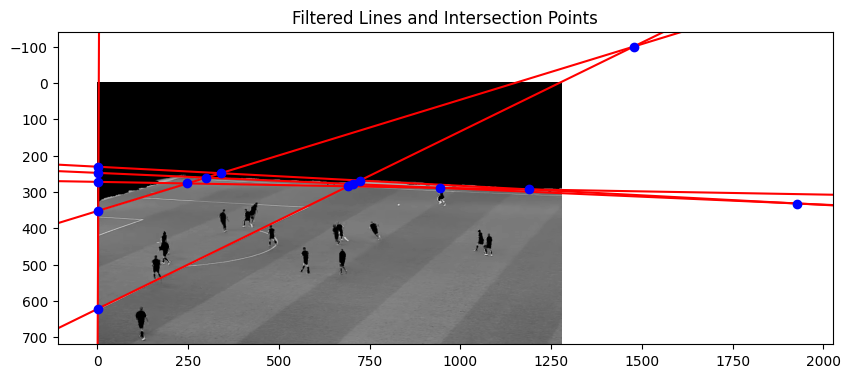

In [25]:
def calculate_intersection(line1, line2):
    """Calculate the intersection point of two lines given by (angle, distance) pairs."""
    angle1, dist1 = line1
    angle2, dist2 = line2

    # Lines in parametric form: r = x*cos(theta) + y*sin(theta)
    A = np.array([
        [np.cos(angle1), np.sin(angle1)],
        [np.cos(angle2), np.sin(angle2)]
    ])
    b = np.array([dist1, dist2])

    if np.linalg.det(A) == 0:  # Lines are parallel
        return None

    intersection_point = np.linalg.solve(A, b)
    return intersection_point

# Further filter out lines that are almost parallel to each other
angle_threshold = 0.0000001  # Angle threshold for determining parallel lines
filtered_lines_final = []

for angle, dist in filtered_lines:
    too_close = False
    for existing_angle, existing_dist in filtered_lines_final:
        if abs(existing_angle - angle) < angle_threshold:
            too_close = True
            break
    if not too_close:
        filtered_lines_final.append((angle, dist))

# Find and print points of intersection of the remaining lines
intersection_points = []
for i in range(len(filtered_lines_final)): 
    for j in range(i + 1, len(filtered_lines_final)): 
        point = calculate_intersection(filtered_lines_final[i], filtered_lines_final[j])
        if point is not None:
            intersection_points.append(point)

# Print the remaining lines
print("Remaining Lines (angle, distance):")
for line in filtered_lines_final:
    print(line)

# Print the points of intersection
print("\nPoints of Intersection (x, y):")
for point in intersection_points:
    print(point)

# Plot the remaining lines and their intersection points
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)

for angle, dist in filtered_lines_final:
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r')

for point in intersection_points:
    ax.plot(point[0], point[1], 'bo')  # Plot intersection points as blue dots

ax.set_title('Filtered Lines and Intersection Points')
plt.show()


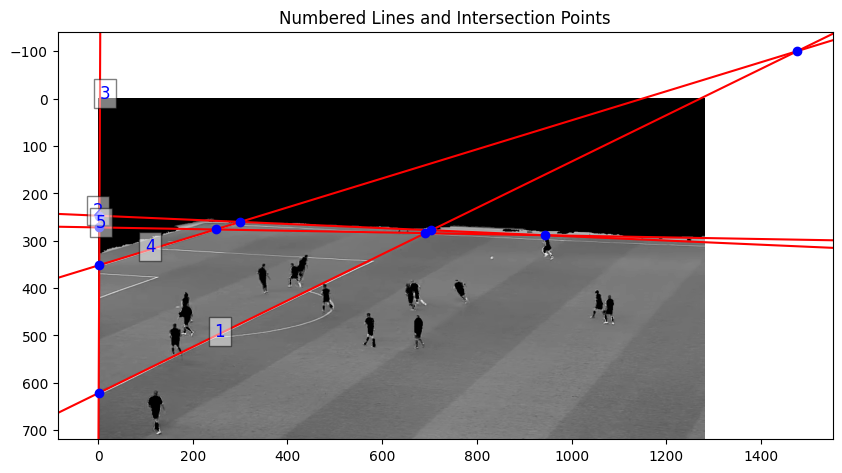

Remaining Lines (index, angle, distance):
Line 1: (angle=1.1157466945200518, distance=559.0)
Line 2: (angle=-1.527041554460777, distance=-247.0)
Line 3: (angle=0.004375477233411917, distance=4.0)
Line 4: (angle=1.2732638749228826, distance=337.0)
Line 5: (angle=-1.5532944178612487, distance=-272.0)


In [14]:
# Plot the remaining lines, their intersection points, and number the lines
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)

# Plot and number the lines
for idx, (angle, dist) in enumerate(filtered_lines_final):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r')
    ax.text(x0, y0, str(idx + 1), color='blue', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Plot the intersection points
for point in intersection_points:
    ax.plot(point[0], point[1], 'bo')  # Plot intersection points as blue dots

ax.set_title('Numbered Lines and Intersection Points')
plt.show()

# Print the remaining lines with their indices
print("Remaining Lines (index, angle, distance):")
for idx, (angle, dist) in enumerate(filtered_lines_final):
    print(f"Line {idx + 1}: (angle={angle}, distance={dist})")


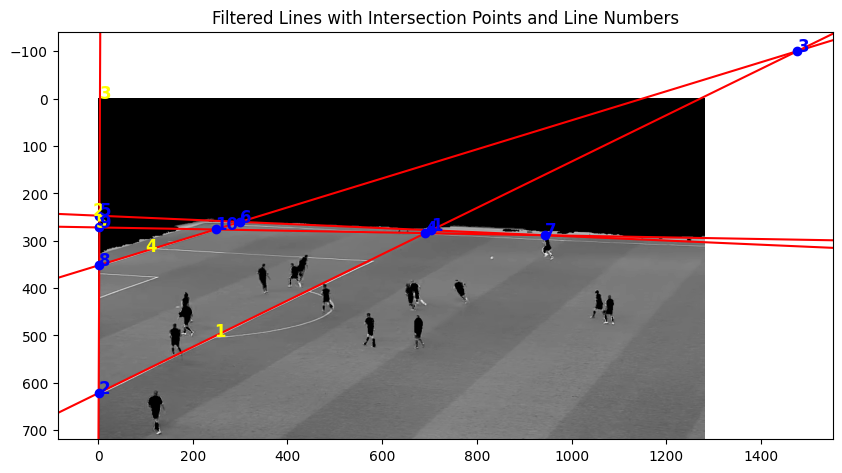

Numbered Lines (angle, distance):
1: (1.1157466945200518, 559.0)
2: (-1.527041554460777, -247.0)
3: (0.004375477233411917, 4.0)
4: (1.2732638749228826, 337.0)
5: (-1.5532944178612487, -272.0)


In [15]:
# Plot the remaining lines with their intersection points and line numbers
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)

for idx, (angle, dist) in enumerate(filtered_lines_final):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r')
    ax.text(x0, y0, str(idx + 1), color='yellow', fontsize=12, weight='bold')  # Number the lines

for idx, point in enumerate(intersection_points):
    ax.plot(point[0], point[1], 'bo')  # Plot intersection points as blue dots
    ax.text(point[0], point[1], str(idx + 1), color='blue', fontsize=12, weight='bold')  # Number the points

ax.set_title('Filtered Lines with Intersection Points and Line Numbers')
plt.show()

# Print the remaining lines with their numbers
print("Numbered Lines (angle, distance):")
for idx, line in enumerate(filtered_lines_final):
    print(f"{idx + 1}: {line}")


List of Intersection Coordinates (x, y):
(703.6304670322679, 278.043480150826)
(1.2797759722573165, 621.7024596148742)
(1477.2581806711335, -100.49122329338465)
(2.917694206413138, 247.36437162402214)
(300.358071682862, 260.3871192814583)
(2.461030171283496, 351.73267170142066)


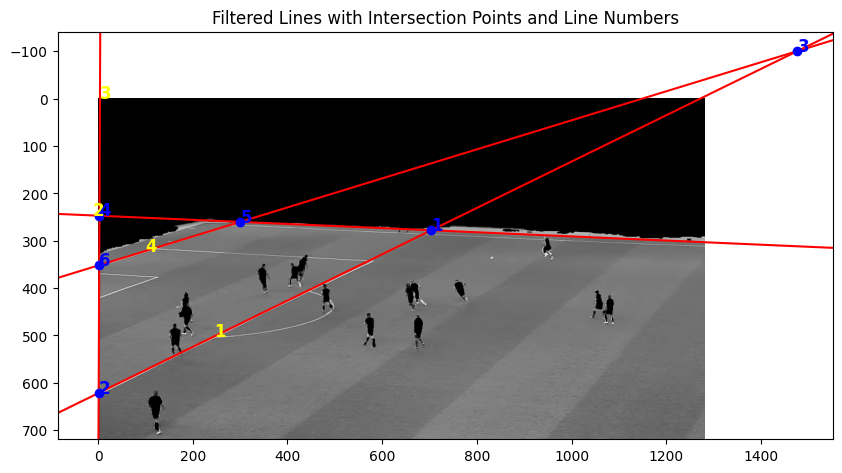

[(703.6304670322679, 278.043480150826),
 (1.2797759722573165, 621.7024596148742),
 (1477.2581806711335, -100.49122329338465),
 (2.917694206413138, 247.36437162402214),
 (300.358071682862, 260.3871192814583),
 (2.461030171283496, 351.73267170142066)]

In [33]:
import matplotlib.pyplot as plt
from skimage import io, color, feature, transform
import numpy as np

# Load the image
image_path = "assets/green_region.png"
image = io.imread(image_path)
gray_image = color.rgb2gray(image)

# Perform edge detection using Canny
edges = feature.canny(gray_image, sigma=2.0)

# Perform Hough transform to detect lines
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 360)
hspace, angles, distances = transform.hough_line(edges, theta=tested_angles)

# Extract line segments
lines = transform.hough_line_peaks(hspace, angles, distances, threshold=0.3 * np.max(hspace))

# Filter out small lines and very close parallel lines
filtered_lines = []
min_line_length = 100  # Minimum length of line to keep
min_distance_between_parallel_lines = 10  # Minimum distance between parallel lines

for _, angle, dist in zip(*lines):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - gray_image.shape[1] * np.cos(angle)) / np.sin(angle)
    line_length = np.sqrt((gray_image.shape[1] - 0) ** 2 + (y1 - y0) ** 2)
    
    if line_length >= min_line_length:
        too_close = False
        for existing_angle, existing_dist in filtered_lines:
            if (abs(existing_angle - angle) < 0.1 and abs(existing_dist - dist) < min_distance_between_parallel_lines):
                too_close = True
                break
        if not too_close:
            filtered_lines.append((angle, dist))

# Define a function to calculate the intersection of two lines
def calculate_intersection(line1, line2):
    """Calculate the intersection point of two lines given by (angle, distance) pairs."""
    angle1, dist1 = line1
    angle2, dist2 = line2

    # Lines in parametric form: r = x*cos(theta) + y*sin(theta)
    A = np.array([
        [np.cos(angle1), np.sin(angle1)],
        [np.cos(angle2), np.sin(angle2)]
    ])
    b = np.array([dist1, dist2])

    if np.linalg.det(A) == 0:  # Lines are parallel
        return None

    intersection_point = np.linalg.solve(A, b)
    return intersection_point

# Further filter out lines that are almost parallel to each other
angle_threshold = 0.1  # Angle threshold for determining parallel lines
filtered_lines_final = []

for angle, dist in filtered_lines:
    too_close = False
    for existing_angle, existing_dist in filtered_lines_final:
        if abs(existing_angle - angle) < angle_threshold:
            too_close = True
            break
    if not too_close:
        filtered_lines_final.append((angle, dist))

# Find and print points of intersection of the remaining lines
intersection_points = []
for i in range(len(filtered_lines_final)):
    for j in range(i + 1, len(filtered_lines_final)):
        point = calculate_intersection(filtered_lines_final[i], filtered_lines_final[j])
        if point is not None:
            intersection_points.append(point)

# Filter out None values from intersection_points
intersection_points = [point for point in intersection_points if point is not None]

# Store the intersection points as pairs of coordinates in a list
intersection_coordinates = [(point[0], point[1]) for point in intersection_points]

# Print the list of intersection coordinates
print("List of Intersection Coordinates (x, y):")
for coords in intersection_coordinates:
    print(coords)

# Plot the remaining lines and their intersection points
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray_image, cmap=plt.cm.gray)

for idx, (angle, dist) in enumerate(filtered_lines_final):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax.axline((x0, y0), slope=np.tan(angle + np.pi/2), color='r')
    ax.text(x0, y0, str(idx + 1), color='yellow', fontsize=12, weight='bold')  # Number the lines

for idx, point in enumerate(intersection_points):
    ax.plot(point[0], point[1], 'bo')  # Plot intersection points as blue dots
    ax.text(point[0], point[1], str(idx + 1), color='blue', fontsize=12, weight='bold')  # Number the points

ax.set_title('Filtered Lines with Intersection Points and Line Numbers')
plt.show()

# Return the list of intersection coordinates
intersection_coordinates


In [38]:
intersection_coordinates

[(703.6304670322679, 278.043480150826),
 (1.2797759722573165, 621.7024596148742),
 (1477.2581806711335, -100.49122329338465),
 (2.917694206413138, 247.36437162402214),
 (300.358071682862, 260.3871192814583),
 (2.461030171283496, 351.73267170142066)]